# Data Preprocessing and Feature Engineering
You should build a machine learning pipeline with a data preprocessing and feature engineering step. In particular, you should do the following:
- Load the `adult` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 
- Conduct data preprocessing and feature engineering by 
    - Identifying the implicit missing values of attributes and replacing them with an explicit missing value using [Pandas](https://pandas.pydata.org/docs/user_guide/missing_data.html#missing-data).
    - removing explicit missing values using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html);
    - encoding categorical attributes using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html);
    - normalizing/scaling features using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html);
    - reducing the dimensionality of the dataset using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html);
    - and handling imbalanced classes using [Imbalanced-Learn](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html).
- Train and test a support vector machine model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
- Evaluate the impact of the data preprocessing and feature engineering techniques on the effectiveness and efficiency of the model.
- Check the documentation to identify the most important hyperparameters, attributes, and methods. Use them in practice.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
df = pd.read_csv("/Users/tactlabs/Documents/uni/sem-2/intro-to-ai-and-machine-learning/teaching/datasets/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df_train, df_test = train_test_split(df) #75/25 split

print("df size:",df.shape)
print("df_train size:",df_train.shape)
print("df_test size:",df_test.shape)

df size: (32561, 15)
df_train size: (24420, 15)
df_test size: (8141, 15)


Data exploration

In [4]:
df_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
target            object
dtype: object

<Axes: >

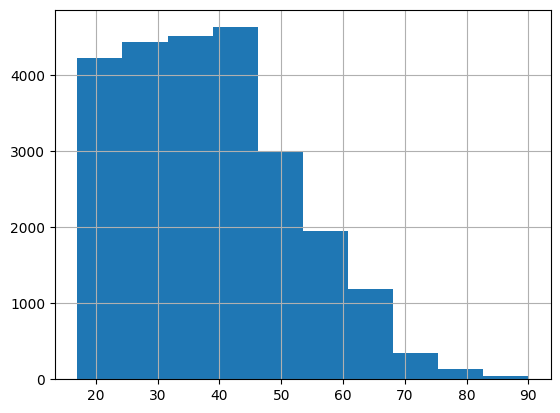

In [5]:
df_train["age"].hist() #visualising if there are any possible outliers

In [6]:
df_train["workclass"].value_counts()

 Private             17035
 Self-emp-not-inc     1899
 Local-gov            1550
 ?                    1377
 State-gov             986
 Self-emp-inc          838
 Federal-gov           718
 Without-pay            11
 Never-worked            6
Name: workclass, dtype: int64

In [7]:
df_train["workclass"].unique() # ' ?' implicit missing value

array([' Private', ' ?', ' Self-emp-inc', ' State-gov', ' Federal-gov',
       ' Self-emp-not-inc', ' Without-pay', ' Local-gov', ' Never-worked'],
      dtype=object)

<Axes: >

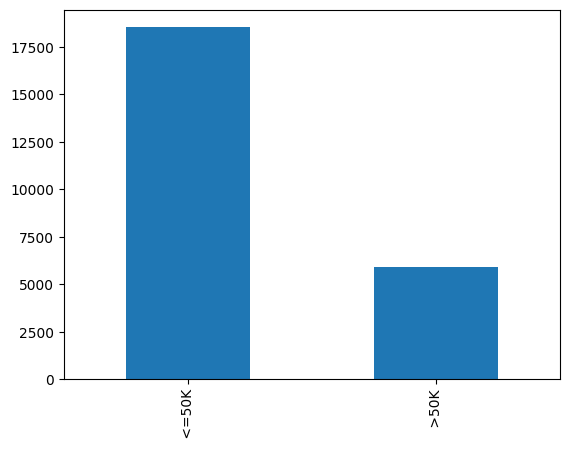

In [8]:
# check imbalance of target variable
df_train["target"].value_counts().plot(kind="bar")

In [9]:
df_train.isnull().values.any()

False

In [10]:
df_train.dropna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
13259,41,Private,29591,HS-grad,9,Divorced,Sales,Not-in-family,White,Male,0,0,30,United-States,<=50K
27588,20,Private,204641,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,40,United-States,<=50K
19293,51,Private,280093,HS-grad,9,Separated,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
25625,34,Private,123270,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
4261,26,Private,333541,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,24,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4604,26,Private,171114,Assoc-voc,11,Separated,Adm-clerical,Unmarried,White,Female,0,0,35,United-States,<=50K
7664,23,Private,215395,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
181,43,Private,114580,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
12457,23,Private,172232,HS-grad,9,Never-married,Tech-support,Own-child,White,Male,0,0,50,United-States,<=50K


Data Preprocessing

In [11]:
x_train = df_train.drop("target", axis=1)
y_train = df_train["target"]

x_test = df_test.drop("target", axis=1)
y_test = df_test["target"]

print("x_train size", x_train.shape)
print("y_train size", y_train.shape)
print("x_test size", x_test.shape)
print("y_test size", y_test.shape)

x_train size (24420, 14)
y_train size (24420,)
x_test size (8141, 14)
y_test size (8141,)


Feature engineering

In [12]:
#Feature engineering
numerical_attributes = x_train.select_dtypes(include = ["int64", "float64"]).columns # Identifying numerical columns
categorical_attributes = x_train.select_dtypes(include = "object").columns # Identifying categorical columns

In [13]:
ct = ColumnTransformer([
    ("standard_scaling", StandardScaler(), numerical_attributes),
    ("one_hot_encoder", OneHotEncoder(handle_unknown="ignore"), categorical_attributes)
]) #ColumnTransformer allows us to tranform multiple columns at ones

In [14]:
# do this or fit_transform()
ct.fit(x_train)
x_train = ct.transform(x_train)
x_test = ct.transform(x_test)

In [15]:
print("x_train size", x_train.shape)
print("x_test size", x_test.shape) #categories are increased hence columns increased

x_train size (24420, 107)
x_test size (8141, 107)


In [16]:
svd = TruncatedSVD(n_components=101) #101 but no significant difference in accuracy with dimensionality reduction 
svd.fit(x_train)
x_train = svd.transform(x_train)
x_test = svd.transform(x_test)

In [17]:
print("x_train size", x_train.shape)
print("x_test size", x_test.shape)

x_train size (24420, 101)
x_test size (8141, 101)


In [18]:
sm = SMOTE(random_state=42) #reduces accuracy score somehow
x_res, y_res = sm.fit_resample(x_train, y_train)

In [19]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({' <=50K': 18532, ' >50K': 18532})


Model Training

In [20]:
#model training
model = SVC()
model.fit(x_res, y_res)

SVC()

Model assessment

In [21]:
y_predict = model.predict(x_test)
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.8205380174425746